# Курсовая работа

## Коростелев Андрей, ИУ5-64Б

### Набор данных:

### 1) Импорт библиотек. Поиск и загрузка набора данных для построения моделей машинного обучения. Проведение разведочного анализа данных. Анализ и заполнение пропусков в данных.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from typing import Dict, Tuple
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import roc_curve, roc_auc_score

В качестве набора данных мы будем использовать набор данных, [содержащий информацию о наличии у пациента сердечного заболевания](https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility)

Датасет состоит из одного файла:
'HeartKR.csv'

В данном датасете имеются следующие признаки:

- Возраст (age);
- Пол (sex);
- Тип боли в груди (cp) - 4 значения;
- Артериальное давление в состоянии покоя (trestbps);
- Уровень холестерина (chol);
- Уровень сахара в крови натощак (fbs) > 120 мг/дл - 2 значения;
- Результаты ЭКГ в покое (restecg) - 3 значения;
- Максимальная частота сердечных сокращений (thalach);
- Стенокардия, вызванная физической нагрузкой (exang) - 2 значения;
- Депрессия ST, вызванная упражнениями по сравнению с отдыхом (oldpeak);
- Наклок сегмента ST при пиковой нагрузке (slope) - 3 значения;
- Количество крупных сосудов с флурозопией (ca) - 5 значений;
- Талассемия (thal) - 4 значения;
- Наличие сердечного заболевания (target) - 2 значения (0 - нет, 1 - есть);

Целевым признаком выберем 'target'

In [2]:
# Загрузка датасета
data = pd.read_csv('data/HeartKR.csv', sep=",")

In [3]:
# Размер датасета
data.shape

(303, 14)

In [4]:
# Список колонок с типами данных
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
# Количество пропущенных значений
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Первые 5 строк датасета
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Мы имеем датасет без пропусков и без категориальных признаков

### 2) Построение графиков, необходимых для понимания структуры данных.

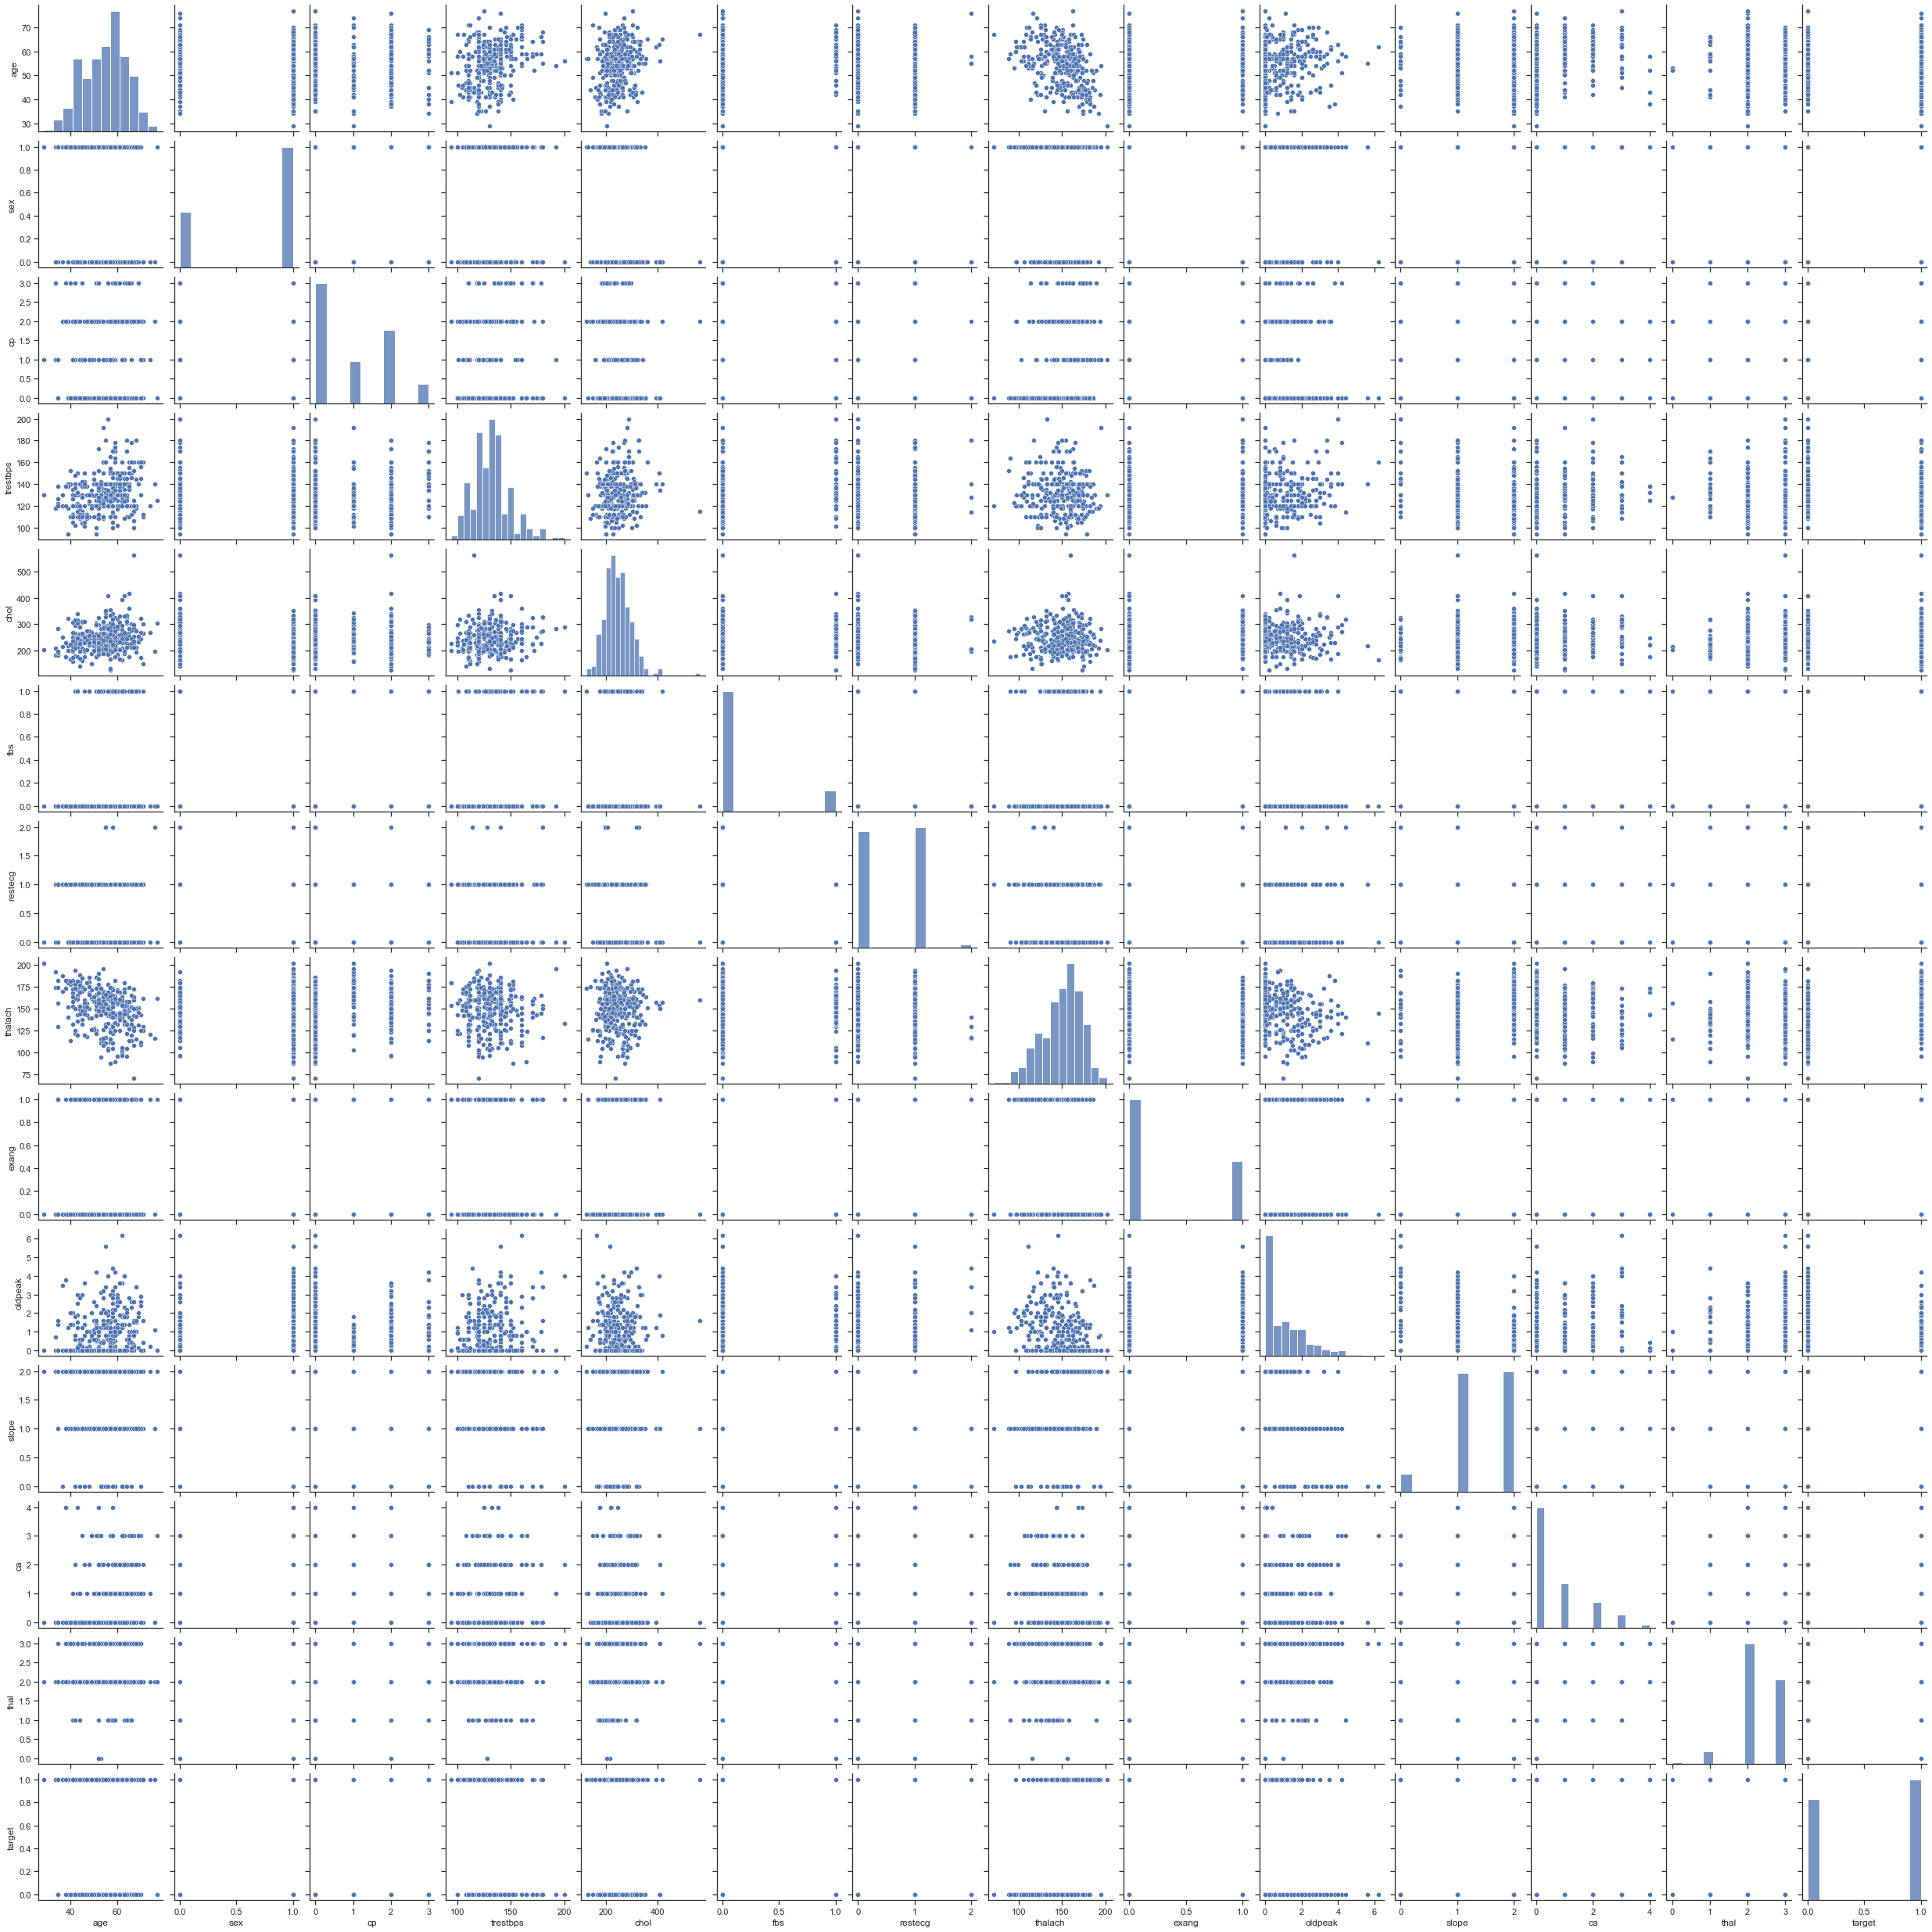

In [7]:
# Парные диаграммы
sns.pairplot(data)

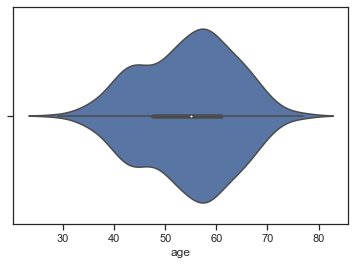

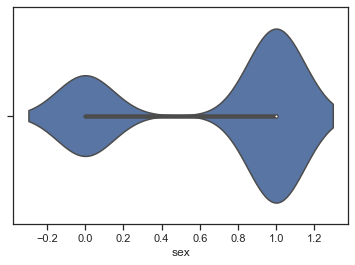

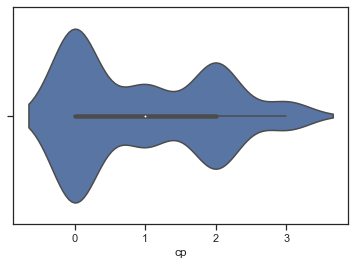

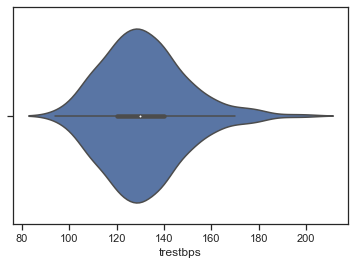

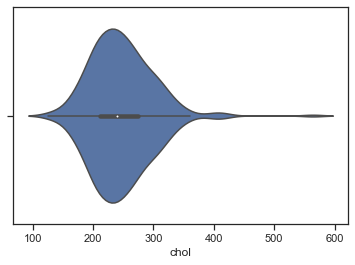

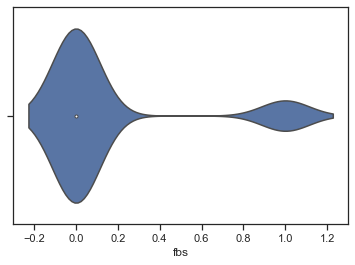

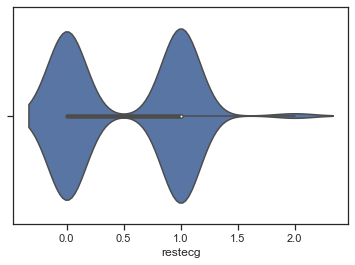

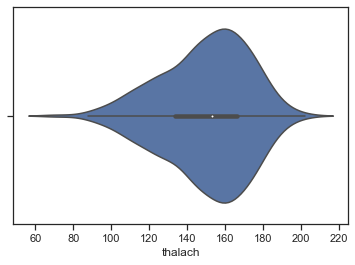

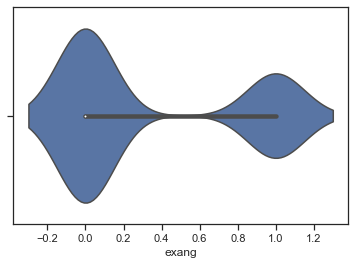

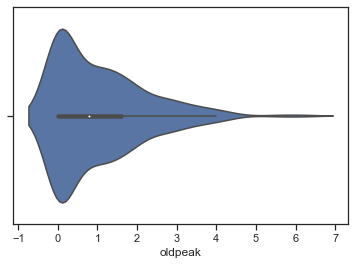

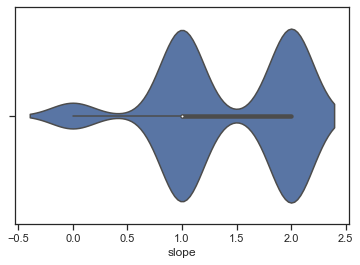

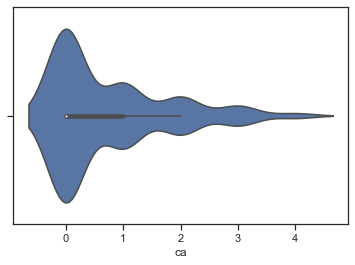

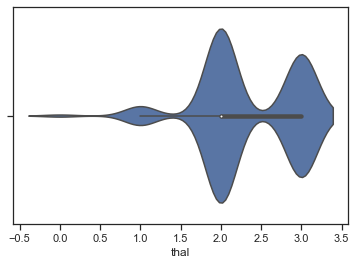

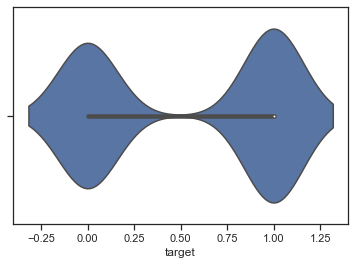

In [8]:
# Скрипичные диаграммы
for col in data.columns:
    sns.violinplot(x=data[col])
    plt.show()

### 3) Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

Категориальные признаки отсутствуют, их кодирование не требуется.

Вспомогательные признаки для улучшения качества моделей в данном примере мы строить не будем.

Выполним масштабирование данных.

In [9]:
# Выполняем масштабирование данных
data['age'] = MinMaxScaler().fit_transform(data[['age']])
data['trestbps'] = MinMaxScaler().fit_transform(data[['trestbps']])
data['chol'] = MinMaxScaler().fit_transform(data[['chol']])
data['thalach'] = MinMaxScaler().fit_transform(data[['thalach']])

In [10]:
# Первые 5 строк датасета
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,2.3,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,3.5,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,1.4,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.8,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.6,2,0,2,1


### 4) Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

<AxesSubplot:>

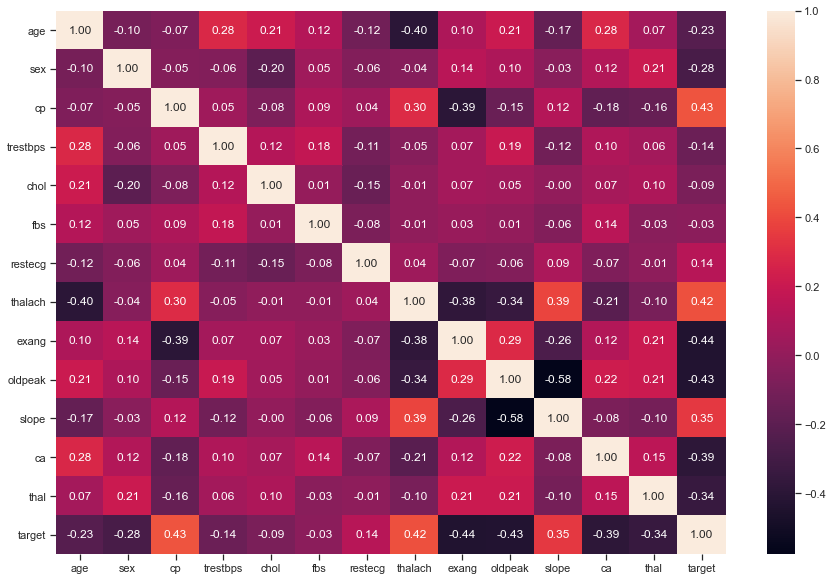

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f')

На основе корреляционной матрицы можно сделать вывод, что сильных линейных зависимостей между признаками нет.

### 5) Выбор метрик для последующей оценки качества моделей.

#### В качестве метрик для решения задачи регрессии будем использовать:

- Accureacy - процент правильно определённых классов;
- Confusion Matrix - количество верно или ошибочно классифицированных данных, представленное в виде матрица;
- ROC-кривая - показатель качества классификации.

### 6) Выбор наиболее подходящих моделей для решения задачи классификации.

Для задачи классификации мы будем использовать следующие модели:

-    Метод ближайших соседей
-    Метод опорных векторов
-    Решающее дерево
-    Случайный лес
-    Градиентный бустинг

### 7) Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [12]:
data_X = data.drop(columns='target')
data_X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,2.3,0,0,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,3.5,0,0,2
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,1.4,2,0,2
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.8,2,0,2
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0,0,0.433962,0.262557,0,1,0.396947,1,0.2,1,0,3
299,0.333333,1,3,0.150943,0.315068,0,1,0.465649,0,1.2,1,0,3
300,0.812500,1,0,0.471698,0.152968,1,1,0.534351,0,3.4,1,2,3
301,0.583333,1,0,0.339623,0.011416,0,1,0.335878,1,1.2,1,1,3


In [13]:
data_Y = data['target']
data_Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(data_X,  data_Y, test_size=0.20, random_state = 0)

In [15]:
Y_train=np.ravel(Y_train)
Y_test=np.ravel(Y_test)

In [16]:
# Проверим правильность разделения выборки на тестовую и обучающую. Посмотрим на размеры матриц.
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


### 8) Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров.

In [17]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

#### Метод ближайших соседей

In [18]:
# Решение задачи классификации методом 5 ближайших соседей
Cls_5 = KNeighborsClassifier(n_neighbors = 5)

In [19]:
Cls_5.fit(X_train, Y_train)
target_1 = Cls_5.predict(X_test)

In [20]:
print('Процент точности:',accuracy_score(Y_test, target_1))

Процент точности: 0.8688524590163934


In [21]:
print('Процент точности для каждого класса:')
print_accuracy_score_for_classes(Y_test, target_1)

Процент точности для каждого класса:
Метка 	 Accuracy
0 	 0.8518518518518519
1 	 0.8823529411764706


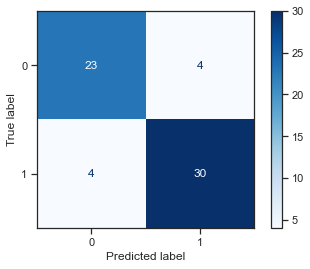

In [22]:
plot_confusion_matrix(Cls_5, X_test, Y_test, 
                      display_labels=['0','1'], cmap=plt.cm.Blues)

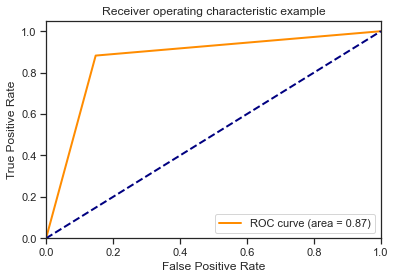

In [23]:
draw_roc_curve(Y_test, target_1, pos_label=1, average='micro')

#### Метод опорных векторов

In [24]:
# Решение задачи классификации методом опорных векторов
svc = SVC()

In [25]:
svc.fit(X_train, Y_train)
target_2 = svc.predict(X_test)

In [26]:
print('Процент точности:',accuracy_score(Y_test, target_2))

Процент точности: 0.8360655737704918


In [27]:
print('Процент точности для каждого класса:')
print_accuracy_score_for_classes(Y_test, target_2)

Процент точности для каждого класса:
Метка 	 Accuracy
0 	 0.7037037037037037
1 	 0.9411764705882353


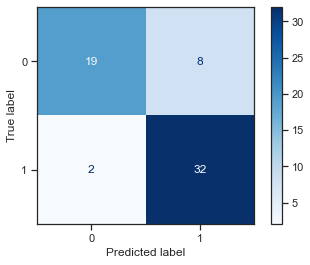

In [28]:
plot_confusion_matrix(svc, X_test, Y_test, 
                      display_labels=['0','1'], cmap=plt.cm.Blues)

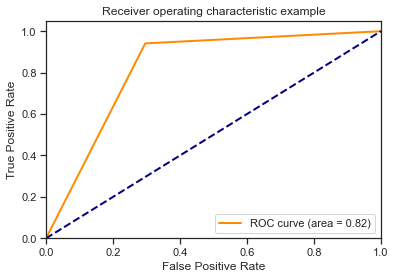

In [29]:
draw_roc_curve(Y_test, target_2, pos_label=1, average='micro')

#### Решающее дерево

In [30]:
# Решение задачи классификации методом решающего дерева
tree = DecisionTreeClassifier(random_state=0)

In [31]:
tree.fit(X_train, Y_train)
target_3 = tree.predict(X_test)

In [32]:
print('Процент точности:',accuracy_score(Y_test, target_3))

Процент точности: 0.7704918032786885


In [33]:
print('Процент точности для каждого класса:')
print_accuracy_score_for_classes(Y_test, target_3)

Процент точности для каждого класса:
Метка 	 Accuracy
0 	 0.8148148148148148
1 	 0.7352941176470589


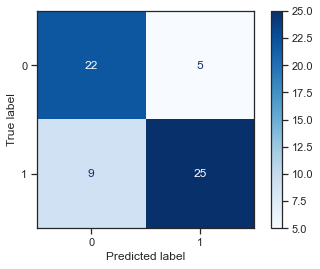

In [34]:
plot_confusion_matrix(tree, X_test, Y_test, 
                      display_labels=['0','1'], cmap=plt.cm.Blues)

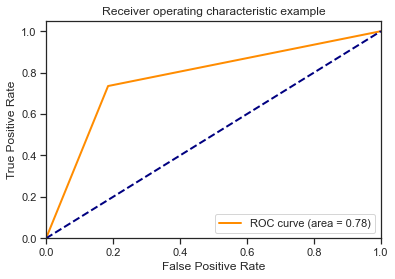

In [35]:
draw_roc_curve(Y_test, target_3, pos_label=1, average='micro')

#### Случайный лес

In [36]:
# Решение задачи классификации методом случайного леса на 5 деревьях
trees = RandomForestClassifier(n_estimators=5, oob_score=True, random_state=0)

In [37]:
trees.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


RandomForestClassifier(n_estimators=5, oob_score=True, random_state=0)

In [38]:
target_4 = trees.predict(X_test)

In [39]:
print('Процент точности:',accuracy_score(Y_test, target_4))

Процент точности: 0.8032786885245902


In [40]:
print('Процент точности для каждого класса:')
print_accuracy_score_for_classes(Y_test, target_4)

Процент точности для каждого класса:
Метка 	 Accuracy
0 	 0.7777777777777778
1 	 0.8235294117647058


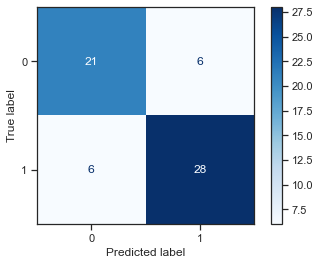

In [41]:
plot_confusion_matrix(trees, X_test, Y_test, 
                      display_labels=['0','1'], cmap=plt.cm.Blues)

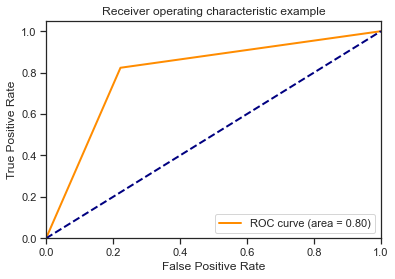

In [42]:
draw_roc_curve(Y_test, target_4, pos_label=1, average='micro')

#### Градиентный бустинг

In [43]:
gr_boost = GradientBoostingClassifier(random_state=0)

In [44]:
gr_boost.fit(X_train, Y_train)
target_5 = gr_boost.predict(X_test)

In [45]:
print('Процент точности:',accuracy_score(Y_test, target_5))

Процент точности: 0.819672131147541


In [46]:
print('Процент точности для каждого класса:')
print_accuracy_score_for_classes(Y_test, target_5)

Процент точности для каждого класса:
Метка 	 Accuracy
0 	 0.7777777777777778
1 	 0.8529411764705882


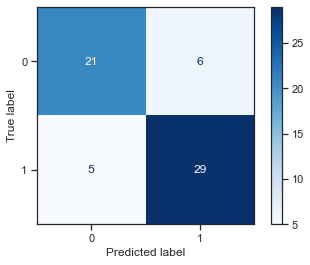

In [47]:
plot_confusion_matrix(gr_boost, X_test, Y_test, 
                      display_labels=['0','1'], cmap=plt.cm.Blues)

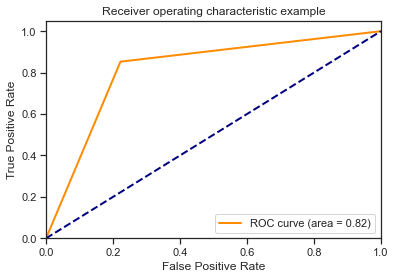

In [48]:
draw_roc_curve(Y_test, target_5, pos_label=1, average='micro')

### 9) Подбор гиперпараметров для выбранных моделей.

#### Метод ближайших соседей

In [49]:
n_range = np.array(range(1,100,1))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
         35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
         52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
         69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
         86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])}]

In [50]:
regr_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
regr_gs.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])}],
             scoring='accuracy')

In [51]:
# Лучшая модель
-regr_gs.best_score_

-0.8306972789115648

In [52]:
# Лучшее значение параметров
regr_gs.best_params_

{'n_neighbors': 16}

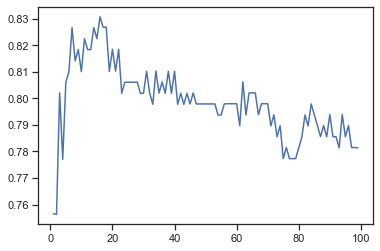

In [54]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, regr_gs.cv_results_['mean_test_score'])

#### Решающее дерево

In [55]:
params = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_leaf': [0.04, 0.06, 0.08],
    'max_features': [0.2, 0.4, 0.6, 0.8]
}

In [56]:
regr_gs1 = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                    param_grid=params, scoring='accuracy', cv=3, n_jobs=-1)
regr_gs1.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.04, 0.06, 0.08]},
             scoring='accuracy')

In [57]:
# Лучшая модель
-regr_gs1.best_score_

-0.797685185185185

In [58]:
# Лучшее значение параметров
regr_gs1.best_params_

{'max_depth': 4, 'max_features': 0.6, 'min_samples_leaf': 0.04}

In [59]:
regr_gs1.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=0.6, min_samples_leaf=0.04,
                       random_state=0)

### 10) Построение решения для выбранных моделей с подбором гиперпараметров.

#### Метод ближайших соседей

In [60]:
# Решение задачи классификации методом 16 ближайших соседей
Cls_16 = KNeighborsClassifier(n_neighbors = 16)

In [61]:
Cls_16.fit(X_train, Y_train)
target_6 = Cls_16.predict(X_test)

In [62]:
print('Процент точности:',accuracy_score(Y_test, target_6))

Процент точности: 0.819672131147541


In [63]:
print('Процент точности для каждого класса:')
print_accuracy_score_for_classes(Y_test, target_6)

Процент точности для каждого класса:
Метка 	 Accuracy
0 	 0.7037037037037037
1 	 0.9117647058823529


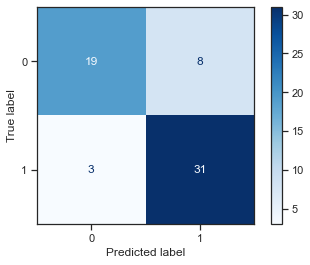

In [65]:
plot_confusion_matrix(Cls_16, X_test, Y_test, 
                      display_labels=['0','1'], cmap=plt.cm.Blues)

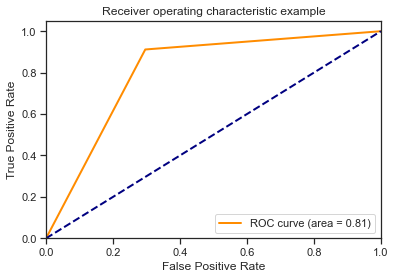

In [66]:
draw_roc_curve(Y_test, target_6, pos_label=1, average='micro')

#### Решающее дерево

In [67]:
treeNEW = DecisionTreeClassifier(max_depth=4, max_features=0.6, min_samples_leaf=0.04, random_state=0).fit(X_train, Y_train)

In [68]:
target_7 = treeNEW.predict(X_test)

In [69]:
print('Процент точности:',accuracy_score(Y_test, target_7))

Процент точности: 0.8032786885245902


In [70]:
print('Процент точности для каждого класса:')
print_accuracy_score_for_classes(Y_test, target_7)

Процент точности для каждого класса:
Метка 	 Accuracy
0 	 0.7407407407407407
1 	 0.8529411764705882


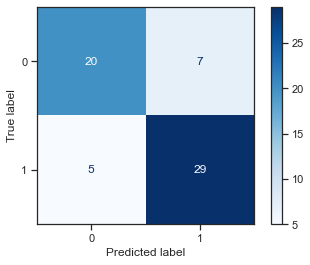

In [71]:
plot_confusion_matrix(treeNEW, X_test, Y_test, 
                      display_labels=['0','1'], cmap=plt.cm.Blues)

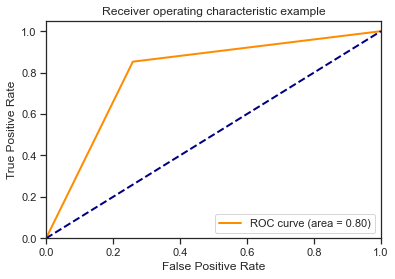

In [72]:
draw_roc_curve(Y_test, target_7, pos_label=1, average='micro')

### 11) Формирование выводов о качестве построенных моделей на основе выбранных метрик.

Лучшей моделью с точки зрения результатов решения задачи классификации, не смотря на свою простоту, оказался метод ближайших соседей, показавший наибольший процент правильного предсказания принадлежности объектов к классам как в целом, так и для каждого класса в отдельности.